Implementing heapsort

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


def heapify(arr, n, i):
    # current as largest, calc. index of left and right child nodes
    largest = i

    left = 2 * i + 1
    right = 2 * i + 2

    # if the left child exists &  greater than the current largest
    if left < n and arr[i] < arr[left]:
        largest = left

    # if the right child exists & greater than the current largest
    if right < n and arr[largest] < arr[right]:
        largest = right

    # If the largest is not the current node, swap the values and recursively heapify
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heapsort(arr):
    n = len(arr)
    # heapifying each non-leaf node in reverse order
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    # extract one by one from the heap
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr  #   sorted array



In [39]:
"""
The input array to be sorted. Returns: sorted array.
    """
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0] #getting pivot as 1st el.
        # Divide into two: elements less than or equal to the pivot (less)
        # and elements greater than the pivot (greater)
        less = [x for x in arr[1:] if x <= pivot]
        greater = [x for x in arr[1:] if x > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

In [40]:
"""Getting start time, sort copy of array, get end time.
Calculate exec. time + length of sorted array """        
def measure_time_and_steps(sort_function, array):
    start = time.time()
    sorted_array = sort_function(array.copy())
    end = time.time()
    execution_time = end - start
    return execution_time, len(sorted_array)

Setting up values for test, printing results

In [41]:
input_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
steps_heapsort = []
steps_quicksort = []

for size in input_sizes:
    # sorted array (asc)
    sorted_array = np.arange(size)
    # Shuffle/random arr
    np.random.shuffle(sorted_array)

    # Time and steps for heapsort on a random array
    time_heapsort_random, steps_heapsort_random = measure_time_and_steps(heapsort, sorted_array.copy())
    steps_heapsort.append(steps_heapsort_random)

    # Time and steps for quicksort on a random array
    time_quicksort_random, steps_quicksort_random = measure_time_and_steps(quicksort, sorted_array.copy())
    steps_quicksort.append(steps_quicksort_random)

    # Time and steps for heapsort on a reversed array (worst-case)
    time_heapsort_worst, steps_heapsort_worst = measure_time_and_steps(heapsort, np.arange(size)[::-1])
    steps_heapsort_worst = np.full_like(input_sizes, steps_heapsort_worst)  # Repeat the value for all input sizes
    
    # Time and steps for quicksort on a reversed array (worst-case)
    time_quicksort_worst, steps_quicksort_worst = measure_time_and_steps(quicksort, np.arange(size)[::-1])
    steps_quicksort_worst = np.full_like(input_sizes, steps_quicksort_worst)  # Repeat the value for all input sizes


    # Print results
    print(f"Size {size}:"
          f"\n  Heapsort time (random) = {time_heapsort_random}, Quicksort time (random) = {time_quicksort_random}"
          f"\n  Heapsort steps (random) = {steps_heapsort_random}, Quicksort steps (random) = {steps_quicksort_random}"
          f"\n  Heapsort time (worst) = {time_heapsort_worst}, Quicksort time (worst) = {time_quicksort_worst}"
          f"\n  Heapsort steps (worst) = {steps_heapsort_worst}, Quicksort steps (worst) = {steps_quicksort_worst}\n")

Size 10:
  Heapsort time (random) = 0.0002830028533935547, Quicksort time (random) = 0.00016570091247558594
  Heapsort steps (random) = 10, Quicksort steps (random) = 10
  Heapsort time (worst) = 3.4332275390625e-05, Quicksort time (worst) = 0.0002315044403076172
  Heapsort steps (worst) = [10 10 10 10 10 10 10], Quicksort steps (worst) = [10 10 10 10 10 10 10]

Size 50:
  Heapsort time (random) = 0.00014543533325195312, Quicksort time (random) = 0.00012373924255371094
  Heapsort steps (random) = 50, Quicksort steps (random) = 50
  Heapsort time (worst) = 0.0007398128509521484, Quicksort time (worst) = 0.0006983280181884766
  Heapsort steps (worst) = [50 50 50 50 50 50 50], Quicksort steps (worst) = [50 50 50 50 50 50 50]

Size 100:
  Heapsort time (random) = 0.00041961669921875, Quicksort time (random) = 0.000232696533203125
  Heapsort steps (random) = 100, Quicksort steps (random) = 100
  Heapsort time (worst) = 0.0002932548522949219, Quicksort time (worst) = 0.005342721939086914
  H

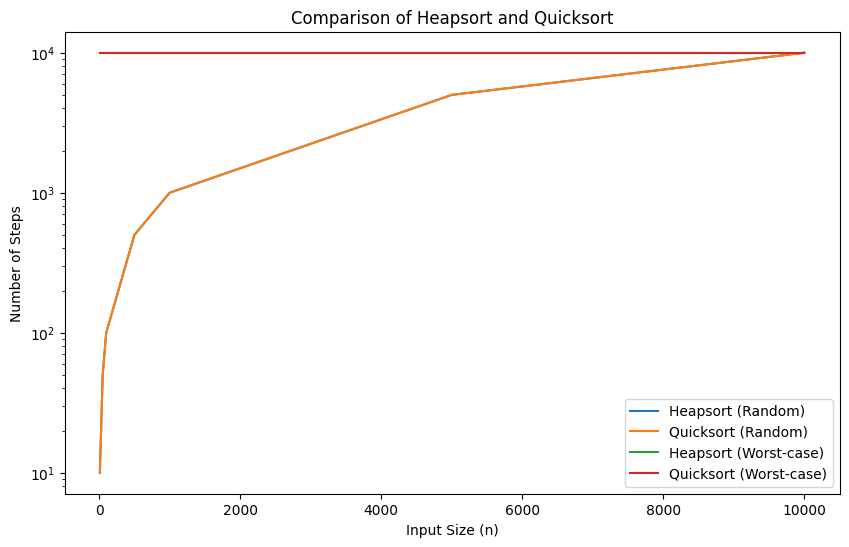

In [42]:
# Plotting combined results with logarithmic scale on y-axis
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, steps_heapsort, label='Heapsort (Random)')
plt.plot(input_sizes, steps_quicksort, label='Quicksort (Random)')


plt.plot(input_sizes, steps_heapsort_worst, label='Heapsort (Worst-case)')
plt.plot(input_sizes, steps_quicksort_worst, label='Quicksort (Worst-case)')

plt.xlabel('Input Size (n)')
plt.ylabel('Number of Steps')
plt.title('Comparison of Heapsort and Quicksort')
plt.legend()
plt.yscale('log')  # Set logarithmic scale on the y-axis
plt.show()
